# Adapted from CS109a Introduction to Data Science and multiple other sources
## Seminar 9, Exercise 1: Boosting

The goal of this exercise is to understand Gradient Boosting Regression.


## Instructions:

- Part A:
- Read the dataset housing train as a pandas dataframe.
- Take a quick look at the dataset.
- Assign the predictor and response variables appropriately as mentioned in the scaffold.
- Fit a single decision tree stump and predict on the entire data.
- Calculate the residuals and fit another tree on the residuals.
- Take a combination of the trees and fit on the model.
- For each of these model use the helper code provided to plot the model prediction and data.

- Part B: Compare to bagging
- Split the data into train and test splits.
- Specify the number of bootstraps for bagging to be 30 and a maximum depth of 3.
- Define a Gradient Boosting Regression model that uses with 1000 estimators and depth of 1.
- Define a Bagging Regression model that uses the Decision Tree as its base estimator.
- Fit both the models on the train data.
- Use the helper code to predict using the mean model and individual estimators. The plot will look similar to the one given above.
- Compute the MSE of the 2 models on the test data.

## Hints:

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html" target="_blank">sklearn.DecisionTreeRegressor()</a>
A decision tree regressor.

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor.fit" target="_blank">regressor.fit()</a>
Build a decision tree regressor from the training set (X, y).

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html" target="_blank">sklearn.DecisionTreeClassifier()</a>
Generates a Logistic Regression classifier.

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.fit" target="_blank">classifier.fit()</a>
Build a decision tree classifier from the training set (X, y).

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html" target="_blank">sklearn.train_test_split()</a>
Split arrays or matrices into om train and test subsets.

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingRegressor.html" target="_blank">BaggingRegressor()</a>
Returns a Bagging regressor instance.

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html" target="_blank">sklearn.mean_squared_error()</a>
Mean squared error regression loss.

<a href="https://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_regression.html" target="_blank">GradientBoostingRegressor()</a>
Gradient Boosting for regression.

In [3]:
# Import necessary libraries
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
%matplotlib inline


In [4]:
# Read the dataset airquality.csv
df = pd.read_csv("C:\\Users\\wirze\\DataspellProjects\\DS_DAPS\\9-lab\\data\\train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
# Take a quick look at the data
# Remove rows with missing values
df = df[df.SalePrice.notna()]
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
# Assign "x" column as the predictor variable and "y" as the
# We only use LotArea as a predictor for this exercise and SalePrice as the response
x, y = df['LotArea'].values, df['SalePrice'].values

# Sorting the data based on X values
x, y = list(zip(*sorted(zip(x,y))))
x, y = np.array(x).reshape(-1,1),np.array(y)


## Part A: Gradient Boosting by hand

In [7]:
# Initialise a single decision tree stump
basemodel = DecisionTreeRegressor()

# Fit the stump on the entire data
basemodel.fit(x, y)

# Predict on the entire data
y_pred = basemodel.predict(x)


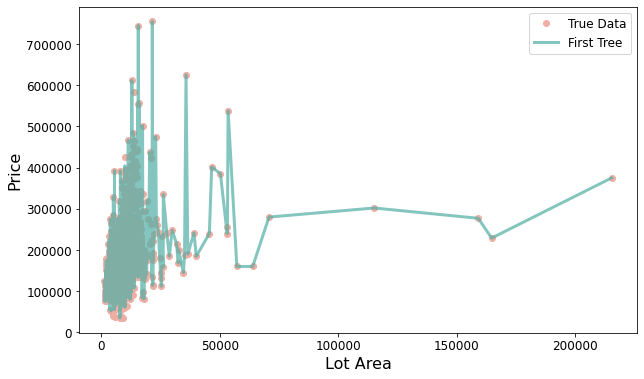

In [8]:
# Helper code to plot the data
plt.figure(figsize=(10,6))
xrange = np.linspace(x.min(),x.max(),100)
plt.plot(x,y,'o',color='#EFAEA4', markersize=6, label="True Data")
plt.xlim()
plt.plot(x,y_pred,alpha=0.7,linewidth=3,color='#50AEA4', label='First Tree')
plt.xlabel("Lot Area", fontsize=16)
plt.ylabel("Price", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc='best',fontsize=12)
plt.show()


In [9]:
# Calculate the error residuals
residuals = (y - y_pred)


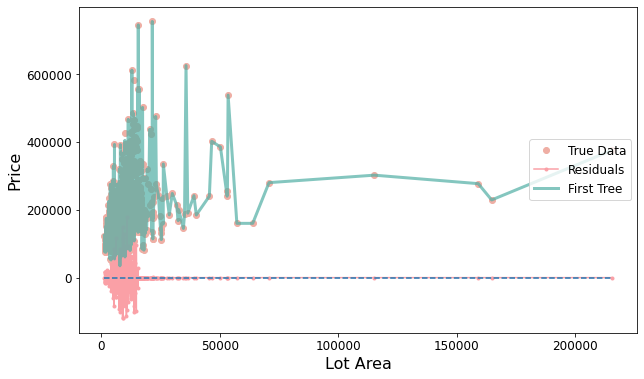

In [10]:
# Helper code to plot the data with the residuals
plt.figure(figsize=(10,6))
plt.plot(x,y,'o',color='#EFAEA4', markersize=6, label="True Data")
plt.plot(x,residuals,'.-',color='#faa0a6', markersize=6, label="Residuals")
plt.plot([x.min(),x.max()],[0,0],'--')
plt.xlim()
plt.plot(x,y_pred,alpha=0.7,linewidth=3,color='#50AEA4', label='First Tree')
plt.xlabel("Lot Area", fontsize=16)
plt.ylabel("Price", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc='center right',fontsize=12)
plt.show()


In [11]:
# Initialise a tree stump
dtr = DecisionTreeRegressor()

# Fit the tree stump on the residuals
dtr.fit(X = residuals.reshape(-1, 1), y=y)

# Predict on the entire data
y_pred_residuals = dtr.predict(x)


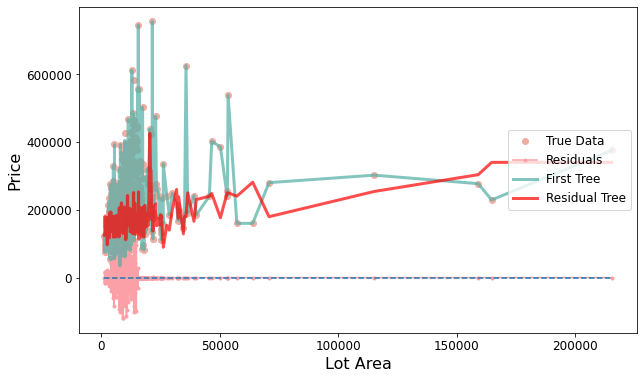

In [12]:
# Helper code to add the fit of the residuals to the original plot
plt.figure(figsize=(10,6))

plt.plot(x,y,'o',color='#EFAEA4', markersize=6, label="True Data")
plt.plot(x,residuals,'.-',color='#faa0a6', markersize=6, label="Residuals")
plt.plot([x.min(),x.max()],[0,0],'--')
plt.xlim()
plt.plot(x,y_pred,alpha=0.7,linewidth=3,color='#50AEA4', label='First Tree')
plt.plot(x,y_pred_residuals,alpha=0.7,linewidth=3,color='red', label='Residual Tree')
plt.xlabel("Lot Area", fontsize=16)
plt.ylabel("Price", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc='center right',fontsize=12)
plt.show()

In [13]:
# Set a lambda value and compute the predictions based on
# the residuals
lambda_ = 1
y_pred_new = dtr.predict(residuals.reshape(-1, 1))


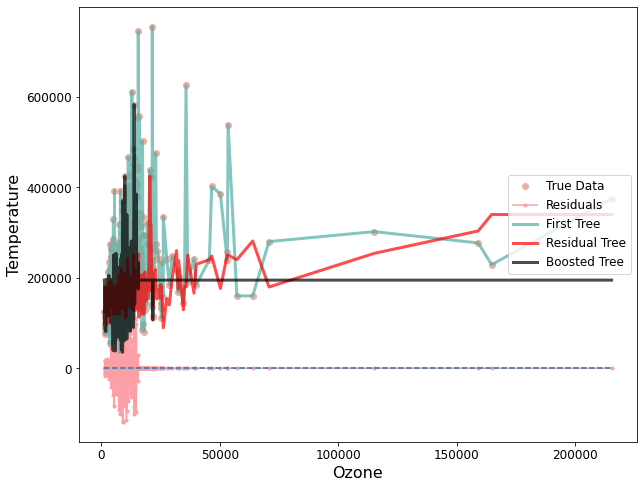

In [14]:
# Helper code to plot the boosted tree
plt.figure(figsize=(10,8))
plt.plot(x,y,'o',color='#EFAEA4', markersize=6, label="True Data")
plt.plot(x,residuals,'.-',color='#faa0a6', markersize=6, label="Residuals")
plt.plot([x.min(),x.max()],[0,0],'--')
plt.xlim()
plt.plot(x,y_pred,alpha=0.7,linewidth=3,color='#50AEA4', label='First Tree')
plt.plot(x,y_pred_residuals,alpha=0.7,linewidth=3,color='red', label='Residual Tree')
plt.plot(x,y_pred_new,alpha=0.7,linewidth=3,color='k', label='Boosted Tree')
plt.xlabel("Ozone", fontsize=16)
plt.ylabel("Temperature", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc='center right',fontsize=12)
plt.show()


# Part 2: Comparison with Bagging

To compare the two methods, we will be using sklearn's methods and not our own implementation from above.

In [15]:
# Split the data into train and test sets with train size as 0.8
# and random_state as 102
# The default value for shuffle is True for train_test_split, so the ordering we
# did above is not a problem.
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=102)


In [16]:
# Set a learning rate
l_rate = 0.1

# Initialise a Boosting model using sklearn's boosting model
# Use 1000 estimators, depth of 2 and learning rate as defined above
boosted_model  = GradientBoostingRegressor(n_estimators=1000, max_depth=2, learning_rate=l_rate)

# Fit on the train data
boosted_model.fit(x_train, y_train)

# Predict on the test data
y_pred = boosted_model.predict(x_test)
y_pred

array([175240.9113657 , 252340.14546652, 168232.01522663, 326980.73704309,
       162272.82081192, 197831.29984371, 162372.67629595, 115697.54253311,
       171597.86053501, 181544.44362552, 201618.22021229,  91651.09845124,
       139768.25594817, 169167.60995501, 160444.945761  , 136804.59263327,
       199249.83455258, 170827.38518666, 203302.40136529, 199866.73842432,
       174584.34379126, 158731.78296219, 182120.48256775, 165455.04525095,
       117448.45744662, 165325.97822385, 135473.87390285, 137862.44853019,
       142015.11863568, 142015.11863568, 155991.15746765, 143928.96965382,
       142979.65104925, 348136.25222471, 182120.48256775, 180889.73068709,
       179109.74003455, 208319.248735  , 171868.53235137, 213674.6728892 ,
       102504.21465414, 208319.248735  , 176302.17138272, 186332.3007069 ,
       168845.23366551, 155991.15746765, 188551.49971376, 173705.1219552 ,
       197831.29984371, 170563.08630138, 175240.9113657 , 169862.14369634,
       171918.76749796, 1

In [17]:
# Specify the number of bootstraps
num_bootstraps = 30

# Specify the maximum depth of the decision tree
max_depth = 100

# Define the Bagging Regressor Model
# Use Decision Tree as your base estimator with depth as mentioned in max_depth
# Initialise number of estimators using the num_bootstraps value
# Set max_samples as 1 and random_state as 3
model = BaggingRegressor(base_estimator = DecisionTreeRegressor(max_depth = max_depth),
                         n_estimators=num_bootstraps,
                         max_samples=1, random_state=3)


# Fit the model on the train data
model.fit(x_train, y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=100),
                 max_samples=1, n_estimators=30, random_state=3)

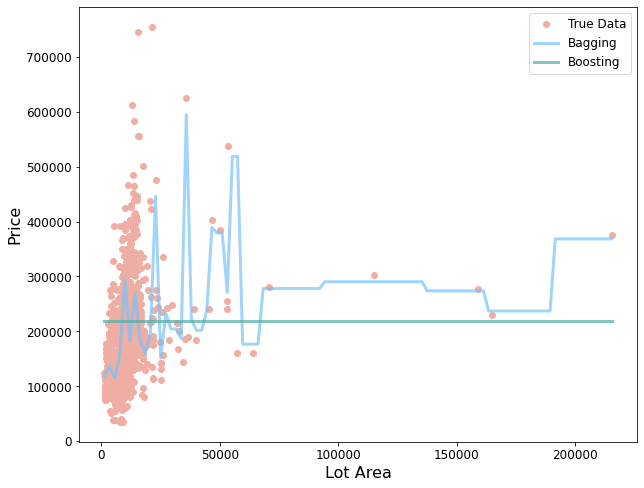

In [18]:
# Helper code to plot the bagging and boosting model predictions
plt.figure(figsize=(10,8))
xrange = np.linspace(x.min(),x.max(),100).reshape(-1,1)
y_pred_boost = boosted_model.predict(xrange)
y_pred_bag = model.predict(xrange)
plt.plot(x,y,'o',color='#EFAEA4', markersize=6, label="True Data")
plt.xlim()
plt.plot(xrange,y_pred_boost,alpha=0.7,linewidth=3,color='#77c2fc', label='Bagging')
plt.plot(xrange,y_pred_bag,alpha=0.7,linewidth=3,color='#50AEA4', label='Boosting')
plt.xlabel("Lot Area", fontsize=16)
plt.ylabel("Price", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc='best',fontsize=12)
plt.show()


In [19]:
# Compute the MSE of the Boosting model prediction on the test data
boost_mse = boosted_model.score(x_test, y_test)
print("The MSE of the Boosting model is", boost_mse)


The MSE of the Boosting model is 0.11006317684697309


In [20]:
# Compute the MSE of the Bagging model prediction on the test data
bag_mse = model.score(x_test, y_test)
print("The MSE of the Bagging model is", bag_mse)


The MSE of the Bagging model is -0.1618901843470446


### <center style="background-color:Gainsboro; width:60%;">Feature importance</center>
Let us also take a very quick look at the feature importance too:

Where here the `F score` is a measure "*...based on the number of times a variable is selected for splitting, weighted by the squared improvement to the model as a result of each split, and averaged over all trees*." [1] Note that these importances are susceptible to small changes in the training data, and it is much better to make use of ["GPU accelerated SHAP values"](https://www.kaggle.com/carlmcbrideellis/gpu-accelerated-shap-values-jane-street-example), incorporated with version 1.3 of XGBoost.
### <center style="background-color:Gainsboro; width:60%;">Links</center>
* XGBoost: [documentation](https://xgboost.readthedocs.io/en/latest/index.html), [GitHub](https://github.com/dmlc/xgboost).
* LightGBM: [documentation](https://lightgbm.readthedocs.io/en/latest/index.html), [GitHub](https://github.com/microsoft/LightGBM).
* CatBoost: [documentation](https://catboost.ai/docs/), [GitHub](http://https://github.com/catboost).

### <center style="background-color:Gainsboro; width:60%;">Videos</center>
For those who enjoy learning via videos, Josh Starmer on his YouTube channel [StatQuest](https://www.youtube.com/c/joshstarmer) has created some very accessible material:
* [Gradient Boost Part 1 (of 4): Regression Main Ideas](https://youtu.be/3CC4N4z3GJc)
* [Gradient Boost Part 2 (of 4): Regression Details](https://youtu.be/2xudPOBz-vs)
* [Gradient Boost Part 3 (of 4): Classification](https://youtu.be/jxuNLH5dXCs)
* [Gradient Boost Part 4 (of 4): Classification Details](https://youtu.be/StWY5QWMXCw)
* [XGBoost Part 1 (of 4): Regression](https://youtu.be/OtD8wVaFm6E)
* [XGBoost Part 2 (of 4): Classification](https://youtu.be/8b1JEDvenQU)
* [XGBoost Part 3 (of 4): Mathematical Details](https://youtu.be/ZVFeW798-2I)
* [XGBoost Part 4 (of 4): Crazy Cool Optimizations](https://youtu.be/oRrKeUCEbq8)

### <center style="background-color:Gainsboro; width:60%;">Related kaggle notebooks</center>
* ["GPU accelerated SHAP values with XGBoost"](https://www.kaggle.com/carlmcbrideellis/gpu-accelerated-shap-values-jane-street-example)
* ["Automatic tuning of XGBoost with XGBTune"](https://www.kaggle.com/carlmcbrideellis/automatic-tuning-of-xgboost-with-xgbtune)
* ["20 Burning XGBoost FAQs Answered to Use Like a Pro"](https://www.kaggle.com/bextuychiev/20-burning-xgboost-faqs-answered-to-use-like-a-pro) written by [BEXGBoost](https://www.kaggle.com/bextuychiev)
* ["A Guide on XGBoost hyperparameters tuning"](https://www.kaggle.com/prashant111/a-guide-on-xgboost-hyperparameters-tuning) by [Prashant Banerjee](https://www.kaggle.com/prashant111)

### <center style="background-color:Gainsboro; width:60%;">References</center>

[1] [J. Elith, J. R. Leathwick, and T. Hastie "*A working guide to boosted regression trees*", Journal of Animal Ecology **77** pp. 802-813 (2008)](https://doi.org/10.1111/j.1365-2656.2008.01390.x)

### <center style="background-color:Gainsboro; width:60%;">Appendix: The RMSLE evaluation metric</center>
From the competition [evaluation page](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview/evaluation) we see that the metric we are using is the root mean squared logarithmic error (RMSLE), which is given by

$$ {\mathrm {RMSLE}}\,(y, \hat y) = \sqrt{ \frac{1}{n} \sum_{i=1}^n \left(\log (1 + \hat{y}_i) - \log (1 + y_i)\right)^2} $$

where $\hat{y}_i$ is the predicted value of the target for instance $i$, and $y_i$
is the actual value of the target for instance $i$.

It is important to note that, unlike the RMSE, the RMSLE is asymmetric; penalizing much more the underestimated predictions than the overestimated predictions. For example, say the correct value is $y_i = 1000$, then underestimating by 600 is almost twice as bad as overestimating by 600: